**Dataset** : House Price - Advanced Regression Techniques from Kaggle

**Main Objective** : Prediction

**Description of Dataset and its Attributes**: This is a Dataset from Kaggle which consists of total 81 columns wherein the last columns is the outcome of the prediction to be done. Here, we are asked to predict the price of the houses on the basis of different Categorical and Numerical Features given in the form of dataset in first 80 columns. It contains different types of  information that are important in order to estimate the price of the house such as
*	LotArea: Lot size in square feet
*	Street: Type of road access to property
*	Alley: Type of alley access to property
*	LotShape: General shape of property
*	MSZoning: Identifies the general zoning classification of the sale.
*	MSSubClass: Identifies the type of dwelling involved in the sale.
*	LotConfig: Lot configuration
*	OverallCond: Rates the overall condition of the house
And many more…

**Result to be obtained** : The last column is “SalePrice” which needs to be predicted.

**Reason to choose this Dataset**: I found it a bit challenging to use “80” columns in order to get the prediction done correctly so I took up this challenge for myself in order to boost my confidence in Regression.

**Initial plan for data exploration:**
  My plan for data exploration is to first split columns into numerical and categorical features and then exploring them seperatly in different ways like using plots of different kinds to know what are the unique values in each column, how is data distributed overall and much more...

**Actions taken for data cleaning and feature engineering:**
*	Importing necessary libraries and loading the data
*	EDA (Exploratory Data Analysis):
   1.	Splitting the columns into numerical and categorical variables
   2.	Preforming Univariant Analysis on Numerical and Categorical Features   separately in order to know which features have constant values
   3.	Preforming Bivariant Analysis on Numerical Features to see which features are highly correlated.
   4.	Finding the number of missing values for all the columns/features.
*	Data processing:
   1.	Dropping the features with consists of lots of missing values cause they are redundant.
   2.	Removing Constant features of both on Numerical and Categorical Features that we explored by Univariant Analysis.
   3.	Dealing with outliers by creating box-plots to see which features have how many outliers.
   4.	Imputing the missing values of Categorical features by replacing all missing values with “NA” tag.
   5.	Imputing the missing values of Numerical features using “mode” or “median”.
**Feature Engineering:**
   1.	Changing the datatype of the feature “MSSubClass” from numerical to string type.
   2.	Applying “get_dummies” on all Categorical Features
   3.	Normalizing the distribution on “SalePrice” column.
*	Applied train_test_split on the dataset.
*	Applied Linear Regression as baseline model  using regularization like Ridge and Lasso Regression.
*	Best Model from all above :
I found that the accuracy was 87% for train data and 99% for test data using “Xgboost” Regression. So I concluded using it as my final model.

**Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner:**
   1.	From the data, I found out that some columns had too many null values and dropped them off.
   2.	I also noticed that “MSSubClass” had numerical features but they were acting like different categories so I changed the datatype of it.
   3.	I found out that there was not much use of implementing Scaling on the data so I skipped it in final model.
   4.	I found out that there were many Categorical features and applied “Dummies” method to convert them into numerical.

**Formulating at least 3 hypothesis about this data:**
  1. Simple Hypothesis: There is a feature named **"GarageYalt"** that is highly correlated to **"SalePrice"** Feature.
  2. Complex Hypothesis: The features named **'GarageYrBlt','TotRmsAbvGrd','1stFlrSF','GarageCars'** that are highly dependent on the independent feature i.e **"SalePrice"**.
  3. Null Hypothesis: Feature named **"PoolQC"** has no relationship with independent feature as it has lots of null values in it.

**Conducting a formal significance test for one of the hypotheses and discuss the results:**
   1. I removed the **"PoolQC"** column from dataset as it had lots of "Null" values in it and it came out to be right decision somewhat.

**Suggestions for next steps in analyzing this data:**
  1. In feature selection, we can perform Extra Tree Regression to get important Features.
  2. Can also apply different types of splitting of data like Cross validation, KFold, stratified KFold, etc
  3. Can also apply Hyperparameter Tuning on Parameters of Ridge and Lasso Regression and many more…

**A paragraph that summarizes the quality of this data set and a request for additional data if needed:**

  I found it a bit challenging to use “80” columns in order to get the prediction done correctly so I took up this challenge for myself in order to boost my confidence in Regression.
  The Quality of data is up to the point and as it already has so many columns to descibe it, there is no need of any more data according to me.




In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/My_Notebooks/ML pipeline/HousePricePrediction/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/My_Notebooks/ML pipeline/HousePricePrediction/test.csv")


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/My_Notebooks/ML pipeline/HousePricePrediction/train.csv'

In [ ]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test_data.head()
test_data.shape

(1459, 80)

In [ ]:
final_df=pd.concat([train_data,test_data],axis=0)   # merging both train and test df in which there is no "SalePrice" col

In [ ]:
final_df.shape

(2919, 81)

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [ ]:
final_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


Splitting into numerical and categorical variables:

In [ ]:
n_val = final_df.select_dtypes(exclude=['object']).drop(['MSSubClass',"SalePrice"], axis=1).copy()   #  "SalePrice" is not there
print(n_val.columns)
l=[]
for i in n_val:
  l.append(i)
print("Total no of numerical variables:",len(l))

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')
Total no of numerical variables: 36


In [ ]:
c_val = final_df.select_dtypes(include=['object']).copy()
c_val['MSSubClass'] = final_df['MSSubClass']
print(c_val.columns)
l=[]
for i in c_val:
  l.append(i)
print("Total no of categorical variables:",len(l))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'MSSubClass'],
      dtype='object')
Total no of categorical variables: 44


# Univariant Analysis

 Numerical variables:

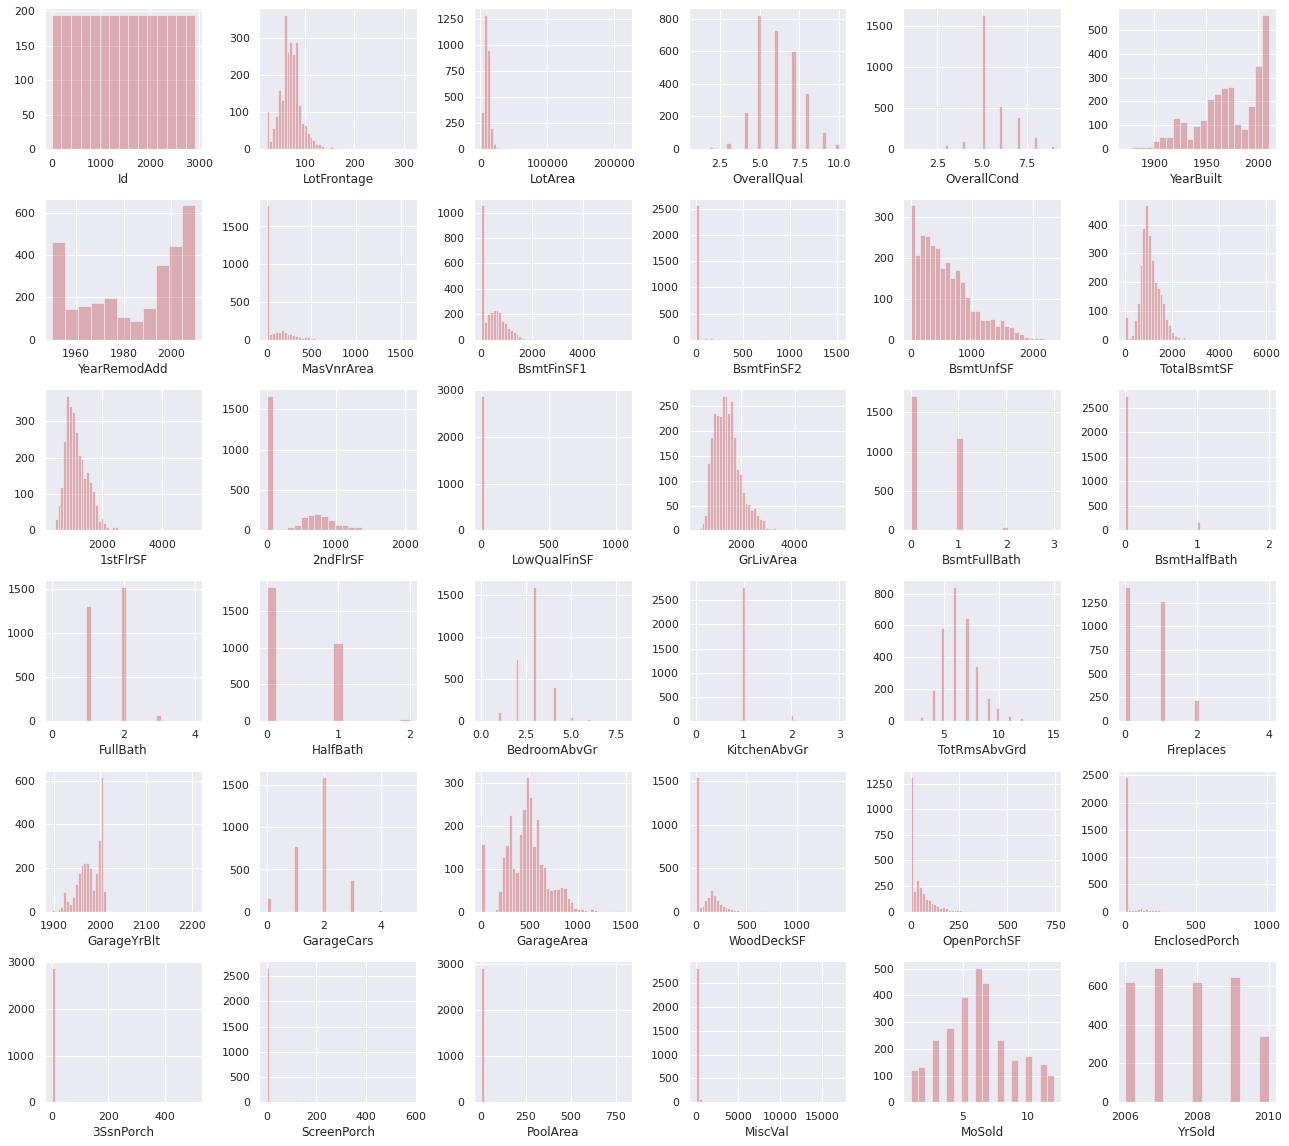

In [ ]:
fig = plt.figure(figsize=(18,16))
for index,col in enumerate(n_val):
    plt.subplot(6,6,index+1)
    sns.distplot(n_val.loc[:,col].dropna(), kde=False,color='r')
fig.tight_layout(pad=1.0)

From the given plots we can tell that certain numerical variables have only one kind of value:
  
*    BsmtFinSF2

*   EnclosedPorch

*  LowQualFinSF

*   3SsnPorch

*  ScreenPorch


*  PoolArea


*  MiscVal


*  KitchenAbgr

*   BsmtHalfBath












Most of the values present in these variables are 0, thus these features can be cleared during the data preprocessing step.

 Categorical Variables

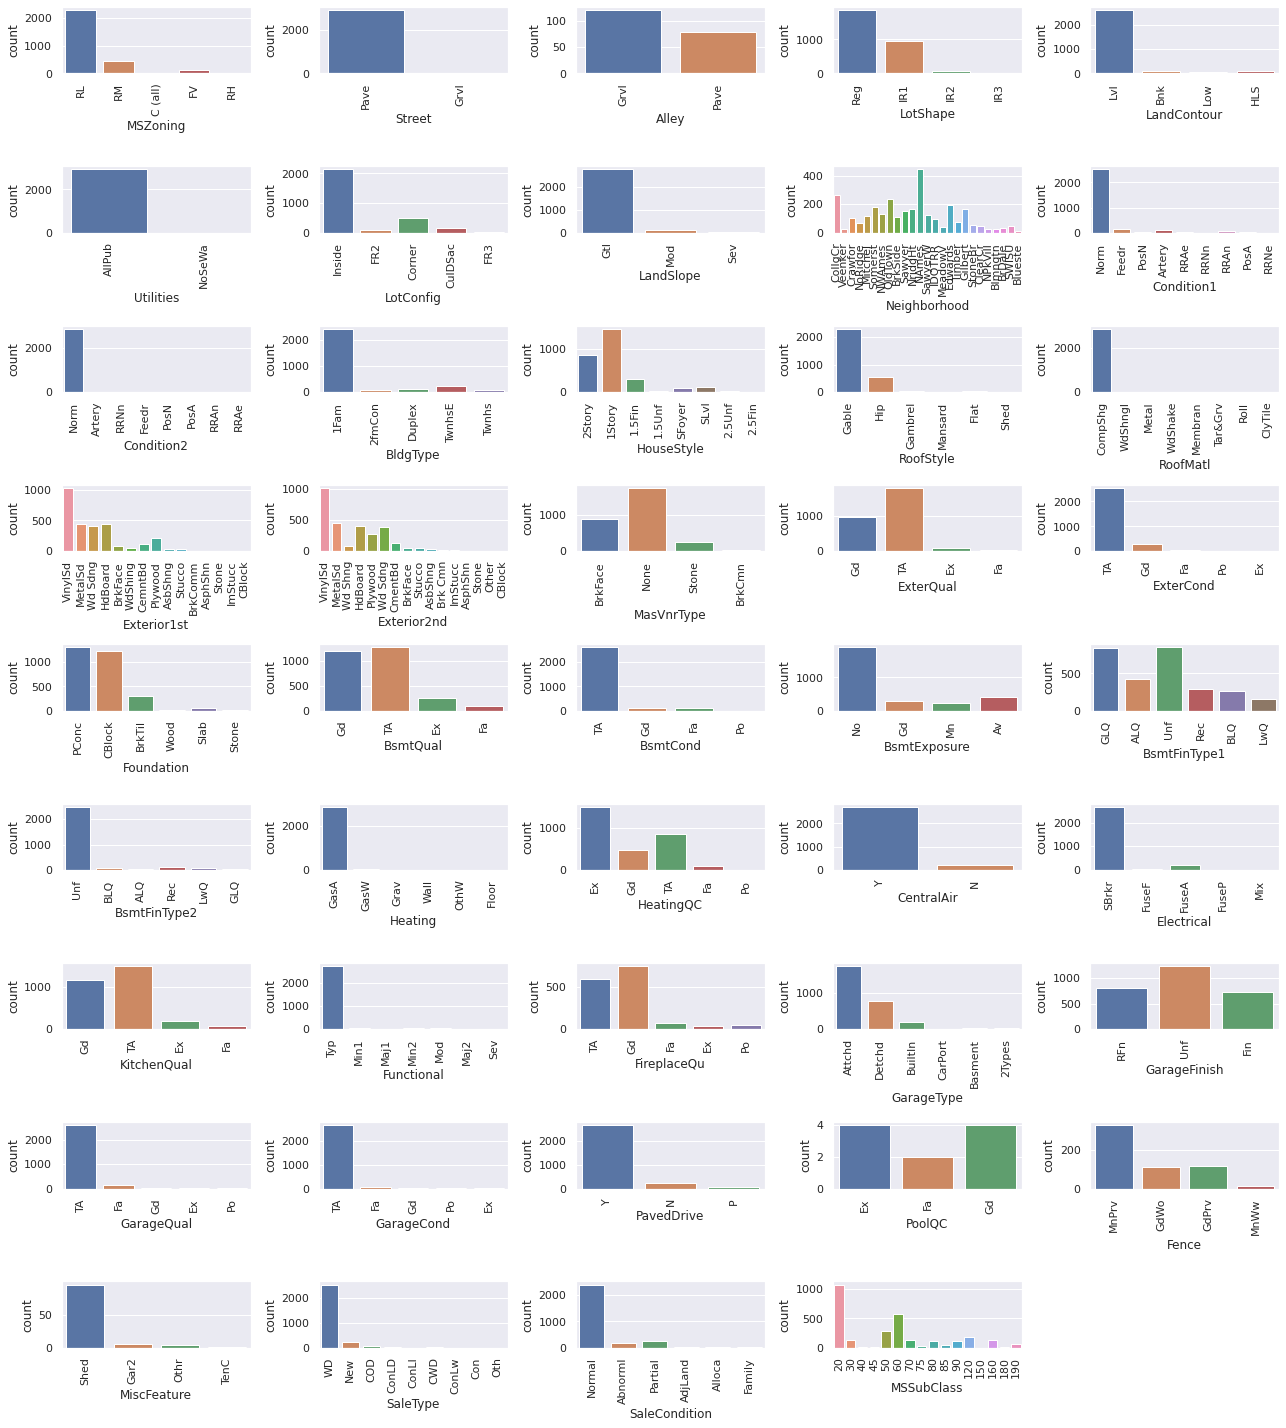

In [ ]:
fig = plt.figure(figsize=(18,20))
for index in range(len(c_val.columns)):
    plt.subplot(9,5,index+1)
    sns.countplot(x=c_val.iloc[:,index], data=c_val.dropna())
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.2)

From the given plots we can tell that certain categorical features have only one kind of value:



*   Condition2

*   Heating

*   RoofMatl

*   Utilites

*   Functional

*   Street

These consist of only one value hence we can remove these features in the data preprocessing step




Bivariate Analysis:

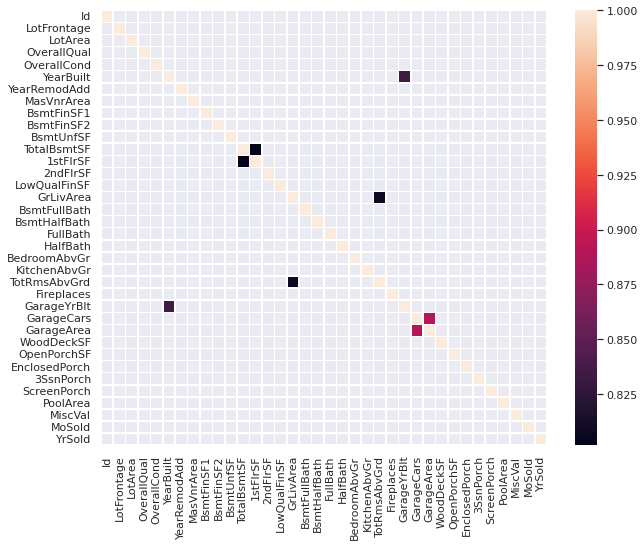

In [ ]:
plt.figure(figsize=(10,8))
correlation = n_val.corr()
sns.heatmap(correlation, mask = correlation <0.8, linewidth=0.5)

From the given correlation matrix we can infer the highly correlated features:



*   GarageYrBlt and YearBuilt

*   TotRmsAbvGrd and GrLivArea

*   1stFlrSF and TotalBsmtSF

*   GarageArea and GarageCars


Data Processing:


We will first drop the highly correlated features which we already found out

In [ ]:
final_df.drop(['GarageYrBlt','TotRmsAbvGrd','1stFlrSF','GarageCars'], axis=1, inplace=True)

In [ ]:
final_df.shape

(2919, 77)

In [ ]:
# From the above scatterplots for various features we can see that

# MoSold
# YrSold
# does not have any linear relationship with the target variable hence we can drop them

# train_data.drop(['MoSold','YrSold'], axis=1, inplace=True)

Dropping the features with consists of lots of missing values cause they are redundant

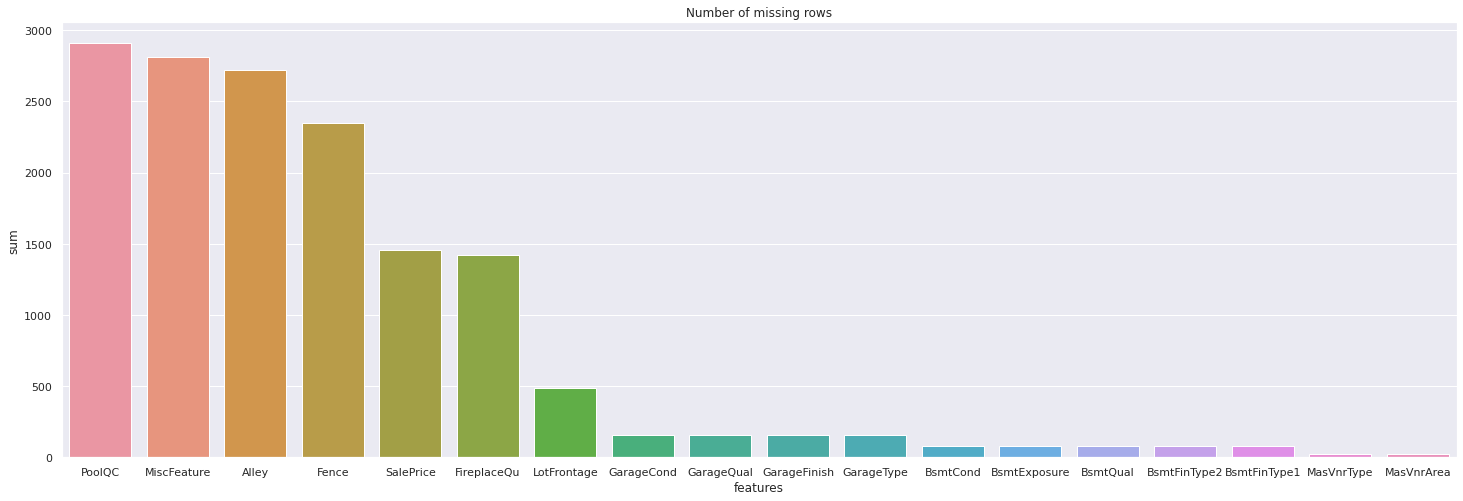

In [ ]:
plt.figure(figsize=(25,8))
plt.title('Number of missing rows')
missing_count = pd.DataFrame(final_df.isnull().sum(), columns=['sum']).sort_values(by=['sum'],ascending=False).head(18).reset_index()
missing_count.columns = ['features','sum']
sns.barplot(x='features',y='sum', data = missing_count)

From the given distribution we can infer that the features named:

*   PoolQC
*   MiscFeature
*   Alley

consists of lots of missing values and hence can be removed

In [ ]:
final_df.drop(['PoolQC','MiscFeature','Alley'], axis=1, inplace=True)

In [ ]:
final_df.shape

(2919, 74)

Removing Constant features:
We will be dropping both

1) Numerical Variables
2) Categorical Variables

which consists of large number of one kind of value's or 0.

In [ ]:
len(final_df)

2919

In [ ]:
counts = final_df['PoolArea'].value_counts()   # zeros are more then 95% of all total distict values in "PoolArea" i.e 95% thi vadhre zeros (constant ek j value che)
print(counts)

0      2906
512       1
648       1
576       1
555       1
480       1
519       1
738       1
144       1
368       1
444       1
228       1
561       1
800       1
Name: PoolArea, dtype: int64


In [ ]:
print(counts.iloc[0])

2906


In [ ]:
#for numerical variables
nval_col = final_df.select_dtypes(exclude=['object']).drop(['MSSubClass'], axis=1).columns
overfit_nvals = []
for i in nval_col:
    counts = final_df[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(final_df) * 100 > 95:     # 95% thi vadhare % if constant ek j value che badhi rows ma then ae constant feature kevay and then is dropped out
        overfit_nvals.append(i)
overfit_nvals = list(overfit_nvals)
final_df = final_df.drop(overfit_nvals, axis=1)

In [ ]:
final_df.shape

(2919, 69)

In [ ]:
#printing constant features
print("Dropped the following Constant numerical features:\n",overfit_nvals)

Dropped the following Constant numerical features:
 ['LowQualFinSF', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', 'MiscVal']


In [ ]:
#for categorical variables
cval_col = final_df.select_dtypes(include=['object']).columns
overfit_cvals = []
for i in cval_col:
    counts = final_df[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(final_df) * 100 > 95:
        overfit_cvals.append(i)
overfit_cvals = list(overfit_cvals)
final_df = final_df.drop(overfit_cvals, axis=1)

In [ ]:
final_df.shape

(2919, 63)

In [ ]:
#printing constant features
print("Dropped the following Constant numerical features:\n",overfit_cvals)

Dropped the following Constant numerical features:
 ['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating']


In [ ]:
nval_col = final_df.select_dtypes(exclude=['object']).drop(['MSSubClass'], axis=1).columns
nval_col.shape

(28,)

In [ ]:
cval_col = final_df.select_dtypes(include=['object']).columns
cval_col.shape

(34,)

In [ ]:
#28+34  # remaining cols after dropping some

In [ ]:
# nval_col1 = final_df.select_dtypes(exclude=['object']).drop(['MSSubClass'], axis=1).copy()
# nval_col1.shape

In [ ]:
#checking the total amount of null values in columns present in the training data
# final_df.isnull().sum()

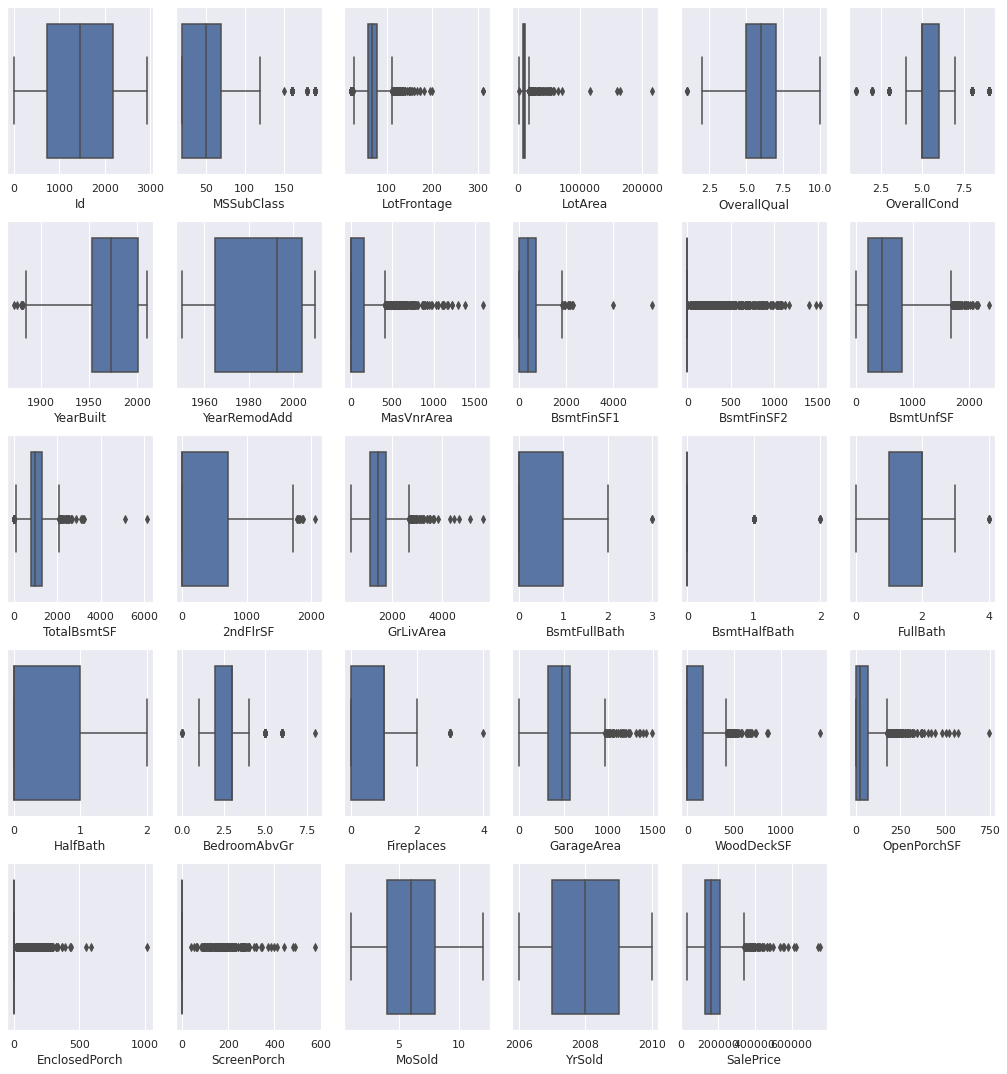

In [ ]:
# ## Dealing with outliers:
# Creating box-plots to find the outliers for the numerical features

nval_col1 = final_df.select_dtypes(exclude=['object']).copy()
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(nval_col1):
    plt.subplot(5,6,index+1)
    sns.boxplot(nval_col1.loc[:,col].dropna())
fig.tight_layout(pad=1.0)

# From the given boxplots , we can infer that certain numerical features have extreme outliers thus we would be removing those outliers.


In [ ]:
median = int(final_df['LotFrontage'].median())
print(median)
final_df["LotFrontage"] = np.where(final_df["LotFrontage"] >200, median,final_df['LotFrontage'])

68


In [ ]:
median = int(final_df['LotArea'].median())
print(median)
final_df["LotArea"] = np.where(final_df["LotArea"] >100000, median,final_df['LotArea'])

9453


In [ ]:
median = int(final_df['BsmtFinSF1'].median())
print(median)
final_df["BsmtFinSF1"] = np.where(final_df["BsmtFinSF1"] >4000, median,final_df['BsmtFinSF1'])

368


In [ ]:
median = int(final_df['TotalBsmtSF'].median())
print(median)
final_df["TotalBsmtSF"] = np.where(final_df["TotalBsmtSF"] >5000, median,final_df['TotalBsmtSF'])

989


In [ ]:
median = int(final_df['GrLivArea'].median())
print(median)
final_df["GrLivArea"] = np.where(final_df["GrLivArea"] >4000, median,final_df['GrLivArea'])

1444


In [ ]:
median = int(final_df['Fireplaces'].median())
print(median)
final_df["Fireplaces"] = np.where(final_df["Fireplaces"] >2.5, median,final_df['LotFrontage'])

1


In [ ]:
# median = int(final_df['LotFrontage'].median())
# final_df["LotFrontage"] = np.where(final_df["LotFrontage"] >200, median,final_df['LotFrontage'])

# median = int(final_df['LotArea'].median())
# final_df["LotArea"] = np.where(final_df["LotArea"] >100000, median,final_df['LotArea'])

# median = int(final_df['BsmtFinSF1'].median())
# final_df["BsmtFinSF1"] = np.where(final_df["BsmtFinSF1"] >4000, median,final_df['BsmtFinSF1'])

# median = int(final_df['TotalBsmtSF'].median())
# final_df["TotalBsmtSF"] = np.where(final_df["TotalBsmtSF"] >5000, median,final_df['TotalBsmtSF'])

# median = int(final_df['GrLivArea'].median())
# final_df["GrLivArea"] = np.where(final_df["GrLivArea"] >4000, median,final_df['GrLivArea'])


# median = int(final_df['Fireplaces'].median())
# final_df["Fireplaces"] = np.where(final_df["Fireplaces"] >2.5, median,final_df['LotFrontage'])


# final_df = final_df.drop(final_df[train_data['LotFrontage'] > 200].index)
# final_df = final_df.drop(final_df[train_data['LotArea'] > 100000].index)
# final_df = final_df.drop(final_df[train_data['BsmtFinSF1'] > 4000].index)
# final_df = final_df.drop(final_df[train_data['TotalBsmtSF'] > 5000].index)
# final_df = final_df.drop(final_df[train_data['GrLivArea'] > 4000].index)
# final_df = final_df.drop(final_df[train_data['Fireplaces'] > 2.5].index)

## Missing values:

In [ ]:
# Finding the missing values

#find the total no of missing values
final_df.isnull().sum().sum()

7302

In [ ]:
final_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 63, dtype: int64

In [ ]:
missval_demo = final_df.isnull().sum()

In [ ]:
missval_demo = missval_demo[missval_demo>0]
missval_demo

MSZoning           4
LotFrontage      486
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
Fireplaces       484
FireplaceQu     1420
GarageType       157
GarageFinish     159
GarageArea         1
GarageQual       159
GarageCond       159
Fence           2348
SaleType           1
SalePrice       1459
dtype: int64

In [ ]:
missval_demo.sort_values(ascending=False)

Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
Fireplaces       484
GarageCond       159
GarageQual       159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Functional         2
BsmtFullBath       2
KitchenQual        1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
GarageArea         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
Electrical         1
dtype: int64

In [ ]:
len(missval_demo.sort_values(ascending=False))

30

In [ ]:
#finding the missing values in features
missval = final_df.isnull().sum()
missval = missval[missval>0]
missval.sort_values(ascending=False)


Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
Fireplaces       484
GarageCond       159
GarageQual       159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Functional         2
BsmtFullBath       2
KitchenQual        1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
GarageArea         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
Electrical         1
dtype: int64

In [ ]:
len(missval.sort_values(ascending=False))

30

In [ ]:
#view of the total number of missing values and the percentage of missing values in each column
total = final_df.isnull().sum().sort_values(ascending=False)
percent = (final_df.isnull().sum()/final_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
Fireplaces,484,0.165810
GarageCond,159,0.054471
GarageQual,159,0.054471
GarageFinish,159,0.054471
GarageType,157,0.053786
BsmtCond,82,0.028092


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   LotConfig      2919 non-null   object 
 8   Neighborhood   2919 non-null   object 
 9   Condition1     2919 non-null   object 
 10  BldgType       2919 non-null   object 
 11  HouseStyle     2919 non-null   object 
 12  OverallQual    2919 non-null   int64  
 13  OverallCond    2919 non-null   int64  
 14  YearBuilt      2919 non-null   int64  
 15  YearRemodAdd   2919 non-null   int64  
 16  RoofStyle      2919 non-null   object 
 17  Exterior1st    2918 non-null   object 
 18  Exterior

In [ ]:
# explicity handling some features
# Mszoning       4  --> cval
# Functional         2   --> cval
# KitchenQual        1   -->  cval


# BsmtFullBath          2 -->nval
# BsmtHalfBath       2   ->nval
# GarageArea         1   --> nval

# TotalBsmtSF       1    --> nval

# BsmtUnfSF          1   --> nval
# BsmtFinSF2         1    --> nval

# BsmtFinSF1         1    --> nval

In [ ]:
# Imputing the missing values:

In [ ]:
# 1) Ordinal Features: Replacing the missing values with 'NA'

for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual',
            'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Fence','FireplaceQu','MSZoning','Functional','KitchenQual']:
    final_df[col] = final_df[col].fillna('NA')

In [ ]:
# 2) Nominal Features: Replacing the missing value of the categorical features with the most frequently occuring values  --> any c_val or n_val can be filled with mode

cols = ["MasVnrArea","MasVnrType", "SaleType", "Electrical","BsmtFullBath","BsmtHalfBath","GarageArea","TotalBsmtSF","BsmtUnfSF","BsmtFinSF2","BsmtFinSF1","Exterior1st","Exterior2nd","Fireplaces"]
final_df[cols] = final_df.groupby("Neighborhood")[cols].transform(lambda x: x.fillna(x.mode()[0]))

In [ ]:
total = final_df.isnull().sum().sort_values(ascending=False)
percent = (final_df.isnull().sum()/final_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
SalePrice,1459,0.499829
LotFrontage,486,0.166495
GarageType,0,0.000000
CentralAir,0,0.000000
Electrical,0,0.000000
2ndFlrSF,0,0.000000
GrLivArea,0,0.000000
BsmtFullBath,0,0.000000
BsmtHalfBath,0,0.000000
FullBath,0,0.000000


In [ ]:
# 3) Numerical Feature: Replacing the missing values with the mean or median depending upon the distribution of the variable

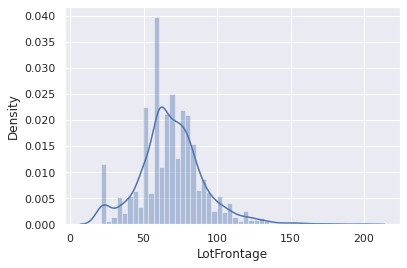

In [ ]:
sns.distplot(final_df['LotFrontage'])

In [ ]:
final_df['LotFrontage'] = final_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

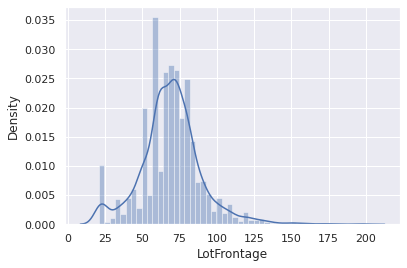

In [ ]:
sns.distplot(final_df['LotFrontage'])

In [ ]:
total = final_df.isnull().sum().sort_values(ascending=False)
percent = (final_df.isnull().sum()/final_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
SalePrice,1459,0.499829
GarageType,0,0.000000
CentralAir,0,0.000000
Electrical,0,0.000000
2ndFlrSF,0,0.000000
GrLivArea,0,0.000000
BsmtFullBath,0,0.000000
BsmtHalfBath,0,0.000000
FullBath,0,0.000000
HalfBath,0,0.000000


In [ ]:
final_df.isnull().sum().sum()   # these are the values of test df "Saleprice" i.e data we have to predict

1459

# Feature Engineering:

In [ ]:
# Changing the datatype of the feature MSSubClass from int to object:

final_df['MSSubClass'] = final_df['MSSubClass'].apply(str)

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   object 
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   LotConfig      2919 non-null   object 
 8   Neighborhood   2919 non-null   object 
 9   Condition1     2919 non-null   object 
 10  BldgType       2919 non-null   object 
 11  HouseStyle     2919 non-null   object 
 12  OverallQual    2919 non-null   int64  
 13  OverallCond    2919 non-null   int64  
 14  YearBuilt      2919 non-null   int64  
 15  YearRemodAdd   2919 non-null   int64  
 16  RoofStyle      2919 non-null   object 
 17  Exterior1st    2919 non-null   object 
 18  Exterior

In [ ]:
for feature in final_df.columns:
  if final_df[feature].dtype=="object":
    print('The feature is {} and number of categories are {}'.format(feature,len(final_df[feature].unique())))

The feature is MSSubClass and number of categories are 16
The feature is MSZoning and number of categories are 6
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is LotConfig and number of categories are 5
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of categories are 4
The feature is ExterQual and number of categories are 4
The feature is ExterCond and number of categories are 5
The feature is Foundation and number of categories are 6
The feature is BsmtQual and number of categories are 5
The feature is BsmtCond and number

In [ ]:
categorical_features = [features for features in final_df.columns if final_df[features].dtype=="object"]
len(categorical_features)

35

In [ ]:
for i in categorical_features:
    print(len(final_df[i].unique()))

16
6
4
4
5
25
9
5
8
6
15
16
4
4
5
6
5
5
5
7
7
5
2
5
5
8
6
7
4
6
6
3
5
9
6


In [ ]:
df_temp = final_df[categorical_features]
df_temp.head()

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
0,60,RL,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,...,Typ,NA,Attchd,RFn,TA,TA,Y,NA,WD,Normal
1,20,RL,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,Gable,...,Typ,TA,Attchd,RFn,TA,TA,Y,NA,WD,Normal
2,60,RL,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,...,Typ,TA,Attchd,RFn,TA,TA,Y,NA,WD,Normal
3,70,RL,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,Gable,...,Typ,Gd,Detchd,Unf,TA,TA,Y,NA,WD,Abnorml
4,60,RL,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,Gable,...,Typ,TA,Attchd,RFn,TA,TA,Y,NA,WD,Normal


In [ ]:
dummies = pd.get_dummies(df_temp,drop_first=True)
dummies.head()

,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
final_df.drop(categorical_features,axis=1,inplace=True)

In [ ]:
final_df_only_numerical_vals = pd.concat([final_df,dummies],axis="columns")
final_df_only_numerical_vals.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
209+17+11           # cat_dummies,int,float --> total = 237

237

In [ ]:
final_df_only_numerical_vals.columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=237)

In [ ]:
df_Train=final_df_only_numerical_vals.iloc[:1460,:]
df_Test=final_df_only_numerical_vals.iloc[1460:,:]

In [ ]:
df_Train.head()   # we dropped some rows so we want to split train and test df in such a way that test df has 1461 as its first id

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
df_Train.tail()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1455,1456,62.0,7917,6,5,1999,2000,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1456,1457,85.0,13175,6,6,1978,1988,119.0,790.0,163.0,...,0,0,0,0,1,0,0,0,1,0
1457,1458,66.0,9042,7,9,1941,2006,0.0,275.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1458,1459,68.0,9717,5,6,1950,1996,0.0,49.0,1029.0,...,0,0,0,0,1,0,0,0,1,0
1459,1460,75.0,9937,5,6,1965,1965,0.0,830.0,290.0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
df_Train.shape

(1460, 237)

In [ ]:
df_Train.isnull().sum().sum()

0

In [ ]:
df_Test.head()    # test data should satrt with ID = 1461

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,0,1,0,0,0,1,0
1,1462,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,1463,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,1464,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,0,1,0,0,0,1,0
4,1465,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
df_Test.shape

(1459, 237)

In [ ]:
df_Test.isnull().sum().sum()   # "SalePrice" has null values as they r to be predicted!

1459

In [ ]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [ ]:
df_Test.shape

(1459, 236)

In [ ]:
df_Test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Columns: 236 entries, Id to SaleCondition_Partial
dtypes: float64(10), int64(17), uint8(209)
memory usage: 616.9 KB


In [ ]:
count = np.isinf(df_Test).values.sum()
print("It contains " + str(count) + " infinite values")

It contains 0 infinite values


In [ ]:
count = pd.isnull(df_Test).values.sum()
print("It contains " + str(count) + " null " )

It contains 0 null 


In [ ]:
#normalizing the distribution of "SalePrice"

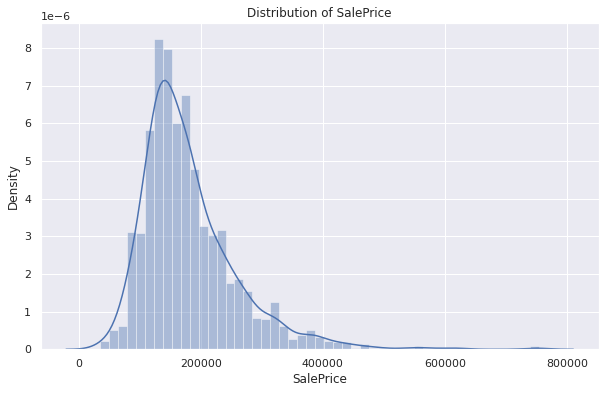

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Distribution of SalePrice")
dist = sns.distplot(df_Train['SalePrice'],norm_hist=False)

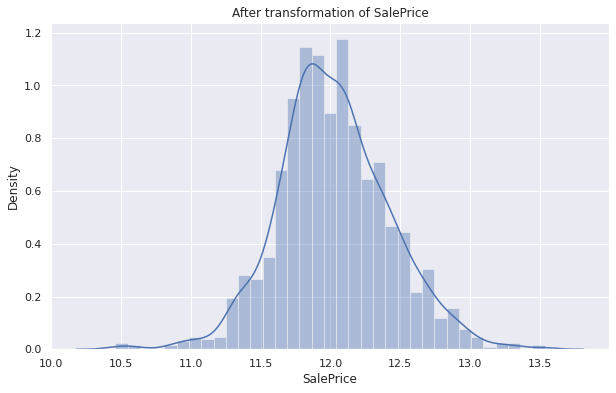

In [ ]:
plt.figure(figsize=(10,6))
plt.title("After transformation of SalePrice")
dist = sns.distplot(np.log(df_Train['SalePrice']),norm_hist=False)

Train_test split manually

In [ ]:
# X_train=df_Train.drop(['SalePrice'],axis=1)
# y_train=df_Train['SalePrice']

#Improving Score using other methods: score was good but didn't improved then my previous submission

1) Extra Tree Classifier for feature selection and then fitting the data internally

In [ ]:
# from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
# reg= ExtraTreesRegressor()

In [ ]:
# X_train=df_Train.drop(['SalePrice'],axis=1)
# y_train=df_Train['SalePrice']

In [ ]:
# reg.fit(X_train,y_train)

In [ ]:
# reg.feature_importances_

In [ ]:
# feat_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
# feat_importances.nlargest(20).plot(kind='barh')
# plt.show()

In [ ]:
# reg.score(X_train,y_train)

In [ ]:
# y_pred=reg.predict(df_Test)

2) Correlation i.e remove the correlated features --> nice improvement and very close to best score but a little less than best score

In [ ]:
# df_Train.corr()

In [ ]:
# import seaborn as sns
# corr=df_Train.iloc[:,:-1].corr()
# top_features=corr.index
# plt.figure(figsize=(20,20))
# sns.heatmap(df_Train[top_features].corr(),annot=True)


In [ ]:
# threshold=0.8

In [ ]:
# find and remove correlated features
# def correlation(dataset, threshold):
#     col_corr = set()  # Set of all the names of correlated columns
#     corr_matrix = dataset.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
#                 colname = corr_matrix.columns[i]  # getting the name of column
#                 col_corr.add(colname)
#     return col_corr

In [ ]:
# correlated = correlation(df_Train.iloc[:,:-1],threshold)
# len(correlated)
# correlated

In [ ]:
# df_Train.shape

In [ ]:
# df_Train.drop(correlated,axis=1,inplace=True)
# print(df_Train.shape)
# df_Test.drop(correlated,axis=1,inplace=True)
# print(df_Test.shape)

In [ ]:
# df_Train.columns

In [ ]:
# X_train=df_Train.drop(['SalePrice'],axis=1)
# y_train=df_Train['SalePrice']

In [ ]:
# from sklearn.model_selection import GridSearchCV
# import xgboost as xgb

In [ ]:
# XgBoost=xgb.XGBRegressor()

# params = {
#             "learning_rate" :[0.1],
#             "n_estimators":[1000],
#             "max_depth":[5],
#             "min_child_weight":[1],
#             "gamma":[0],
#             "subsample":[0.8],
#             "colsample_bytree":[0.8],
#             "objective":['reg:squarederror'],
#             "nthread":[4],
#             "scale_pos_weight":[1],
#             "seed":[27]
#         }

# ridge_regressor = GridSearchCV(XgBoost,params,cv=5)
# ridge_regressor.fit(X_train,y_train)

In [ ]:
# print(ridge_regressor.best_params_)
# print(ridge_regressor.best_score_)
# ridge_regressor.score(X_train,y_train)
# y_pred=ridge_regressor.predict(df_Test)

3) Information Gain

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [ ]:
mutual_info=mutual_info_classif(X_train,y_train)

In [ ]:
mutual_data=pd.Series(mutual_info,index=X_train.columns)
mutual_data.sort_values(ascending=False)

CentralAir_Y           3.625687
Functional_Typ         3.490858
PavedDrive_Y           3.423236
GarageCond_TA          3.314385
Electrical_SBrkr       3.280274
                         ...   
BldgType_TwnhsE        0.000000
BldgType_Twnhs         0.000000
Condition1_RRNn        0.000000
Condition1_RRAn        0.000000
Exterior1st_WdShing    0.000000
Length: 236, dtype: float64

In [ ]:
# chi square something ....feature selection method is left but not doing it now so the conclusion is that simple method is the best

In [ ]:
#Create Sample Submission file and Submit using ANN

# pred=pd.DataFrame(y_pred)
# sub_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/My_Notebooks/HousePricePrediction/sample_submission.csv")
# datasets=pd.concat([df_Test['Id'],pred],axis=1)
# datasets.columns=['Id','SalePrice']
# datasets.to_csv('/content/drive/MyDrive/Colab Notebooks/My_Notebooks/HousePricePrediction/sample_submission2.csv',index=False)

In [ ]:
# Scallig is not helping here instead it is giving some error during fitting the test data to model

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform (df_Test)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform (df_Test)

# Modelling:

# Individually appling XgBoost

In [ ]:
# Parameter of "Xgboost" = "objective"
# reg:squarederror: for linear regression
# reg:logistic: for logistic regression
# binary:logistic: for logistic regression — with output of the probabilities

In [ ]:
# import xgboost as xgb

In [ ]:
# model_params = {
#      'Xgboost': {
#         'model': xgb.XGBRegressor(),
#         'params' : {
#             "learning_rate" :[0.1],
#             "n_estimators":[1000],
#             "max_depth":[5],
#             "min_child_weight":[1],
#             "gamma":[0],
#             "subsample":[0.8],
#             "colsample_bytree":[0.8],
#             "objective":['reg:squarederror'],
#             "nthread":[4],
#             "scale_pos_weight":[1],
#             "seed":[27]
#         }
#     }
#}

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.experimental import enable_halving_search_cv
# from sklearn.model_selection import HalvingGridSearchCV

In [ ]:
# scores = []

# for model_name, np in model_params.items():
#     reg = GridSearchCV(np["model"],np["params"],cv=5,return_train_score = False)
#     reg.fit(X_train,y_train)
#     scores.append({
#         "model" : model_name,
#         "best_score" : reg.best_score_,
#         "best_params" : reg.best_params_
# })

In [ ]:

# scores

In [ ]:
# XgBoost=xgb.XGBRegressor()

# #params = {'alpha' : [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}

# params = {
#             "learning_rate" :[0.1],
#             "n_estimators":[1000],
#             "max_depth":[5],
#             "min_child_weight":[1],
#             "gamma":[0],
#             "subsample":[0.8],
#             "colsample_bytree":[0.8],
#             "objective":['reg:squarederror'],
#             "nthread":[4],
#             "scale_pos_weight":[1],
#             "seed":[27]
#         }

# ridge_regressor = GridSearchCV(XgBoost,params,cv=5)
# ridge_regressor.fit(X_train,y_train)

In [ ]:
# print(ridge_regressor.best_params_)
# print(ridge_regressor.best_score_)

In [ ]:
# ridge_regressor.score(X_train,y_train)

In [ ]:
# y_pred=ridge_regressor.predict(df_Test)

# Individually Applying Linear Regression

In [ ]:
# from sklearn.linear_model import LinearRegression
# lr_clf = LinearRegression()
# lr_clf.fit(X_train,y_train)

# lr_clf.score(X_train,y_train)

In [ ]:
# y_pred=lr_clf.predict(df_Test)

In [ ]:
# y_pred

# Individually Applying Ridge Regression

In [ ]:
# from sklearn.linear_model import Ridge
# from sklearn.model_selection import GridSearchCV
# ridge=Ridge()

# params = {'alpha' : [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}

# ridge_regressor = GridSearchCV(ridge,params,scoring="neg_mean_squared_error",cv=5)
# ridge_regressor.fit(X_train,y_train)

In [ ]:
# print(ridge_regressor.best_params_)
# print(ridge_regressor.best_score_)

In [ ]:
# ridge_regressor.score(X_train,y_train)

In [ ]:
# y_pred=ridge_regressor.predict(df_Test)

In [ ]:
# y_pred

In [ ]:
# collective function to test all regression moddels through Grid or HalvingGrid

# collective function to test all regression moddels through Grid or HalvingGrid

In [ ]:
# import pandas as pd
# from sklearn.linear_model import Lasso
# from sklearn.linear_model import Ridge
# from sklearn.linear_model import LinearRegression
# from sklearn.svm import SVR
# from sklearn.ensemble import RandomForestRegressor
# import xgboost as xgb
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import AdaBoostRegressor

# from sklearn.model_selection import GridSearchCV

# from sklearn.experimental import enable_halving_search_cv
# from sklearn.model_selection import HalvingGridSearchCV

# #  GradientBoost, Random Forest only left to do in these, other all Regression models are there

# Conatins all : Lasso , Ridge, Linear, Random_forest,Xgboost...

In [ ]:
# model_params = {
#     'Lasso': {
#         'model': Lasso(),
#         'params' : {
#             'alpha' : [1e-5,20]    # [20]
#         }
#     },
#     'Ridge': {
#         'model': Ridge(),
#         'params' : {
#             'alpha' : [1e-5,5,10]   # [5,10]
#             }
#     },
#     'linear' : {
#         'model': LinearRegression(),
#         'params': {
#         }
#     },
#     'random_forest': {
#         'model': RandomForestRegressor(),
#         'params' : {
#             'n_estimators': [1,5,10]
#         }
#     },
#    'Xgboost': {
#         'model': xgb.XGBRegressor(),
#         'params' : {
#             "learning_rate" :[0.1],
#             "n_estimators":[1000],
#             "max_depth":[5],
#             "min_child_weight":[1],
#             "gamma":[0],
#             "subsample":[0.8],
#             "colsample_bytree":[0.8],
#             "objective":['reg:squarederror'],
#             "nthread":[4],
#             "scale_pos_weight":[1],
#             "seed":[27]
#         }
#     },
#     #  'AdaBoost': {                             # takes time
#     #     'model' : AdaBoostRegressor(),
#     #     'params' : {
#     #         'n_estimators':[500,1000,2000],
#     #         'learning_rate':[.001,0.01,.1],
#     #         'random_state':[1]
#     #     }
#     # }
#     # 'DecisionTree': {                          # takes more time   -- for getting parameters write "model name and Hyperparameters" on google and u will get articles which will include all parameters of that model or algo
#     #     'model' : DecisionTreeRegressor(random_state=0),
#     #     'params' : {
#     #         "splitter":["best","random"],
#     #         "max_depth" : [1,3,5,7,9,11,12],
#     #        "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
#     #        "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
#     #        "max_features":["auto","log2","sqrt",None],
#     #        "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
#     # },
#     # 'Svr' : {                                # takes too much time too too much
#     #     'model' : SVR(gamma='auto'),
#     #     'params' : {
#     #         'C': [20],
#     #         'kernel': ['rbf','linear'],
#     #         'gamma': [0.001, 0.0001]
#     #     }
#     # }

# }

In [ ]:
# random search cv , halfing grid search cv can be used as they take less time than this

In [ ]:
# scores = []

# for model_name, np in model_params.items():
#     reg = HalvingGridSearchCV(np["model"],np["params"],cv=5,return_train_score = False)
#     reg.fit(X_train,y_train)
#     scores.append({
#         "model" : model_name,
#         "best_score" : reg.best_score_,
#         "best_params" : reg.best_params_
#     })

# Grid Search Cv internally uses KFold for Regression problems and Stratified KFolds for Classification problems which are the best splits so we dont need to do them explicitly

In [ ]:
# scores

In [ ]:
# df = pd.DataFrame(scores,columns=["model","best_score"])
# df

# XgBoost has Best score of all , thats why we implement this to our dataset

In [ ]:
# XgBoost=xgb.XGBRegressor()

# params = {
#             "learning_rate" :[0.1],
#             "n_estimators":[1000],
#             "max_depth":[5],
#             "min_child_weight":[1],
#             "gamma":[0],
#             "subsample":[0.8],
#             "colsample_bytree":[0.8],
#             "objective":['reg:squarederror'],
#             "nthread":[4],
#             "scale_pos_weight":[1],
#             "seed":[27]
#         }

# ridge_regressor = GridSearchCV(XgBoost,params,cv=5)
# ridge_regressor.fit(X_train,y_train)

In [ ]:
# print(ridge_regressor.best_params_)
# print(ridge_regressor.best_score_)
# ridge_regressor.score(X_train,y_train)
# y_pred=ridge_regressor.predict(df_Test)

In [ ]:
# ridge_regressor.score(X_train,y_train)

In [ ]:
# y_pred=ridge_regressor.predict(df_Test)

In [ ]:
#Create Sample Submission file and Submit using ANN

# pred=pd.DataFrame(y_pred)
# sub_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/My_Notebooks/ML pipeline/HousePricePrediction/sample_submission.csv")
# datasets=pd.concat([df_Test['Id'],pred],axis=1)
# datasets.columns=['Id','SalePrice']
# datasets.to_csv('/content/drive/MyDrive/Colab Notebooks/HousePricePrediction/sample_submission.csv',index=False)

# EVAL for model choosing...

In [ ]:
# fiting algoritms
EV_model = AutoMLSearch(X_train=X , y_train=y ,problem_type='regression' ,max_time=1200)
EV_model.search()

In [ ]:
EV_model.rankings

In [ ]:
EV_model.best_pipeline

In [ ]:
y_predict=EV_model.best_pipeline.predict(X_valid)
MAE = mean_absolute_error(y_valid,y_predict)
MSE = mean_squared_error(y_valid , y_predict)
print("MAE---------->" ,MAE)
print("MSE---------->" ,MSE)

# submission

In [ ]:
!pip install pandas -U
import pandas as pd

In [ ]:
test_predict =EV_model.best_pipeline.predict(X_test)
sample['SalePrice'] =test_predict
sample.to_csv('submission.csv' , index=False)
sample.head()